In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv("C:/Users/SONY/Desktop/p case study/Python Foundation Case Study 1 - Retail Case Study (1)/Customer.csv")
prod_info = pd.read_csv("C:/Users/SONY/Desktop/p case study/Python Foundation Case Study 1 - Retail Case Study (1)/prod_cat_info.csv")
transaction = pd.read_csv("C:/Users/SONY/Desktop/p case study/Python Foundation Case Study 1 - Retail Case Study (1)/Transactions.csv")

In [3]:
customer.shape

(5647, 4)

In [4]:
prod_info.shape

(23, 4)

In [5]:
transaction.shape

(23053, 10)

In [6]:
customer.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


In [7]:
prod_info.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


In [8]:
transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [9]:
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"}, inplace =True)

In [10]:
prod_info.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [11]:
## Q no 1 - Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.

prod_trans = pd.merge(left = transaction, right = prod_info, on= ["prod_cat_code","prod_subcat_code"], how="left")


In [12]:
prod_trans.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers


In [13]:
Customer_Final = pd.merge(left = prod_trans, right = customer, left_on= "cust_id", right_on= "customer_Id", how="left")

In [14]:
Customer_Final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [16]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [18]:
## converting tran_date and DOB in date format
Customer_Final["DOB"]= pd.to_datetime(Customer_Final["DOB"])
Customer_Final["tran_date"]= pd.to_datetime(Customer_Final["tran_date"])

In [19]:
Customer_Final["tran_date"].head(3)
                                  

0   2014-02-28
1   2014-02-27
2   2014-02-24
Name: tran_date, dtype: datetime64[ns]

In [20]:
Customer_Final["DOB"].head(3)

0   1981-09-26
1   1973-11-05
2   1992-07-27
Name: DOB, dtype: datetime64[ns]

In [21]:
Customer_Final.duplicated().sum()

13

In [22]:
## Handeling the missing values
Customer_Final.drop_duplicates(inplace = True)

In [23]:
Customer_Final.duplicated().sum()

0

In [24]:
#Q no 2 --  Prepare a summary report for the merged data set.

## a. Get the column names and their corresponding data types
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [25]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [26]:
## b. Top/Bottom 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-09-10,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-04-11,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [27]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-10-08,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-12-10,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


In [28]:
## c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customer_Final.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23040.0,5.006955e+10,2.898062e+10,3268991.000,2.493315e+10,5.009188e+10,7.532632e+10,9.998755e+10
cust_id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05
prod_subcat_code,23040.0,6.148785e+00,3.726197e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23040.0,3.763498e+00,1.677091e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23040.0,2.435764e+00,2.264326e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23040.0,6.370950e+02,6.217274e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23040.0,2.486775e+02,1.871883e+02,7.350,9.828000e+01,1.990800e+02,3.657675e+02,7.875000e+02
total_amt,23040.0,2.109865e+03,2.505610e+03,-8270.925,7.624500e+02,1.756950e+03,3.570255e+03,8.287500e+03
customer_Id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05
city_code,23032.0,5.483067e+00,2.863331e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


In [29]:
## d. Frequency tables for all the categorical variables
Customer_Final.loc[:,Customer_Final.dtypes== "object"].describe().T

,count,unique,top,freq
Store_type,23040,4,e-Shop,9304
prod_cat,23040,6,Books,6066
prod_subcat,23040,18,Women,3046
Gender,23031,2,M,11804


In [31]:
## Q no 3-- Generate histograms for all continuous variables and frequency bars for categorical variables.
## Histogram of continuou variables

cont_customer= Customer_Final.loc[:, ["prod_subcat_code","prod_cat_code","Qty","Rate","Tax","total_amt"]]

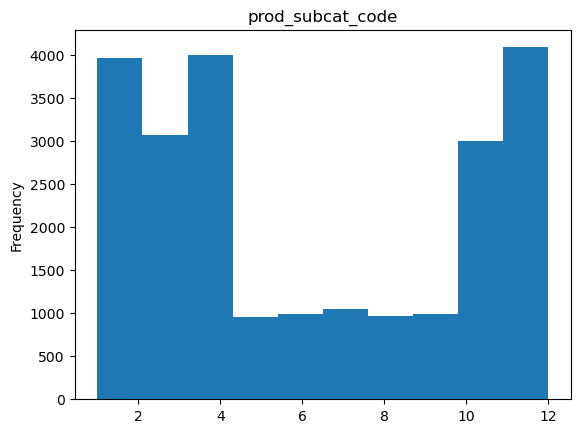

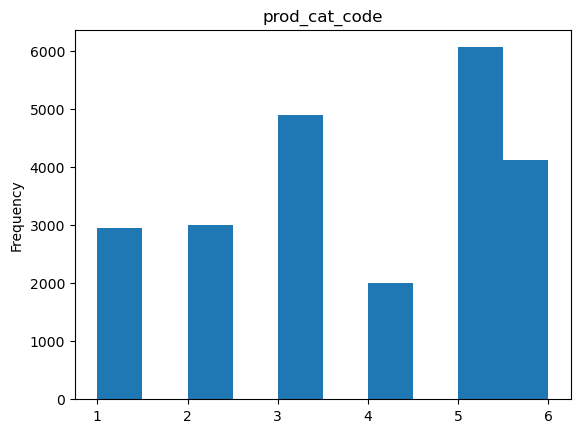

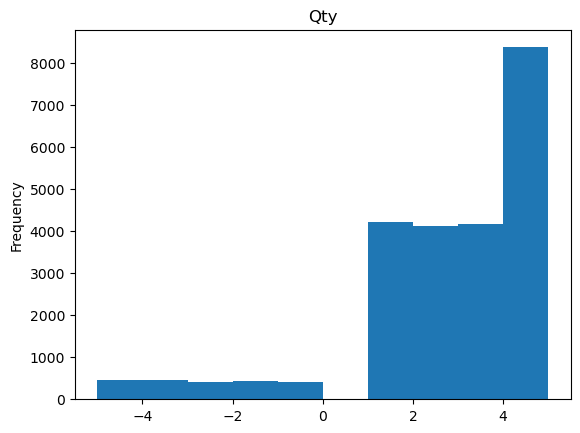

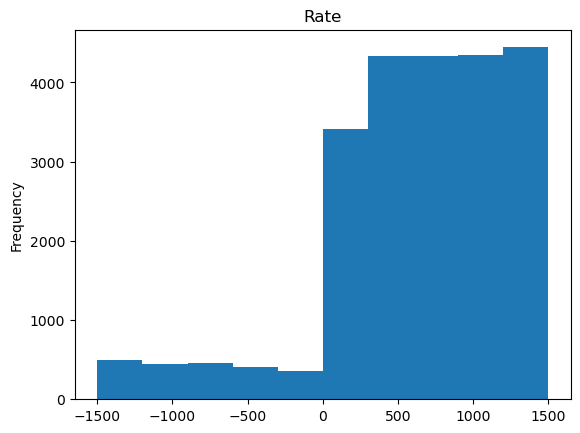

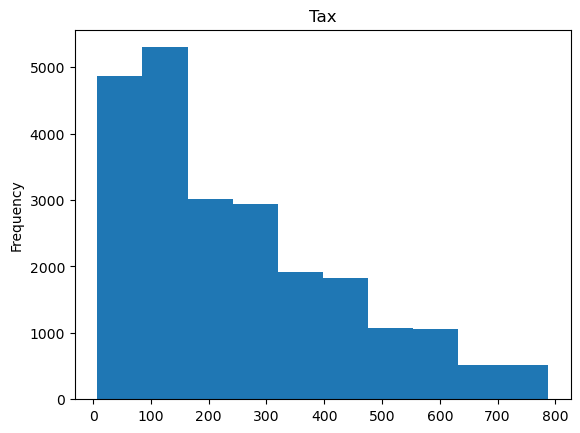

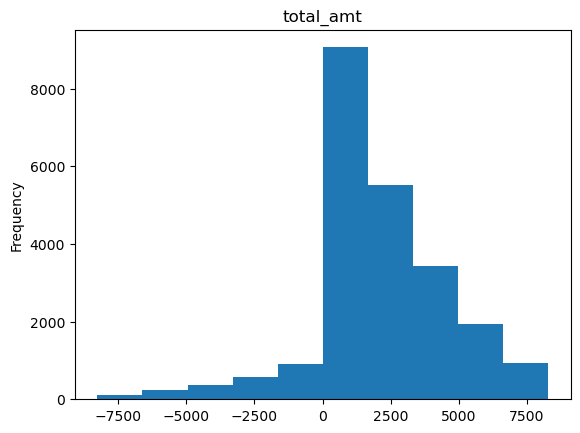

In [32]:
for x in cont_customer.columns:
    cont_customer[x].plot(kind="hist")
    plt.title(x)
    plt.show()
    

In [33]:
category_customer = Customer_Final.loc[:, Customer_Final.dtypes== "object"]

In [34]:
category_customer.columns

Index(['Store_type', 'prod_cat', 'prod_subcat', 'Gender'], dtype='object')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


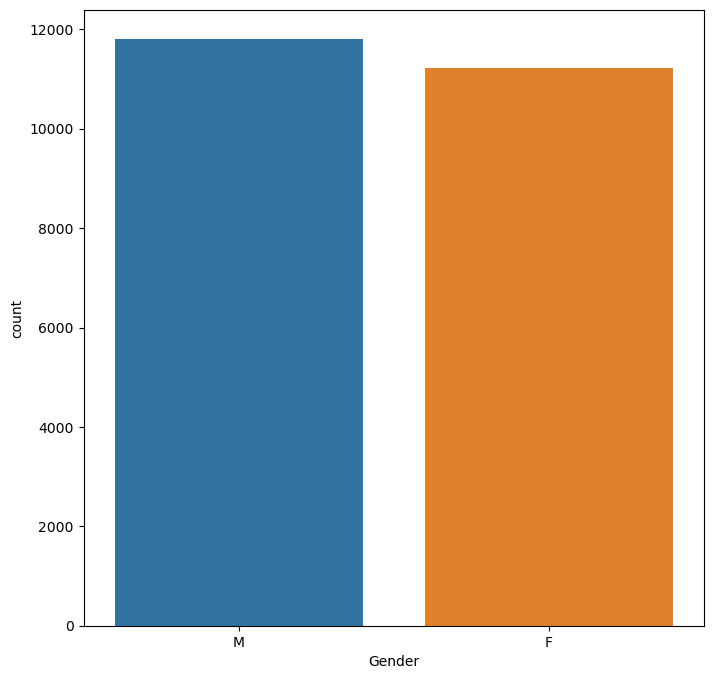

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Gender'])
plt.xlabel('Gender')
plt.show()

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


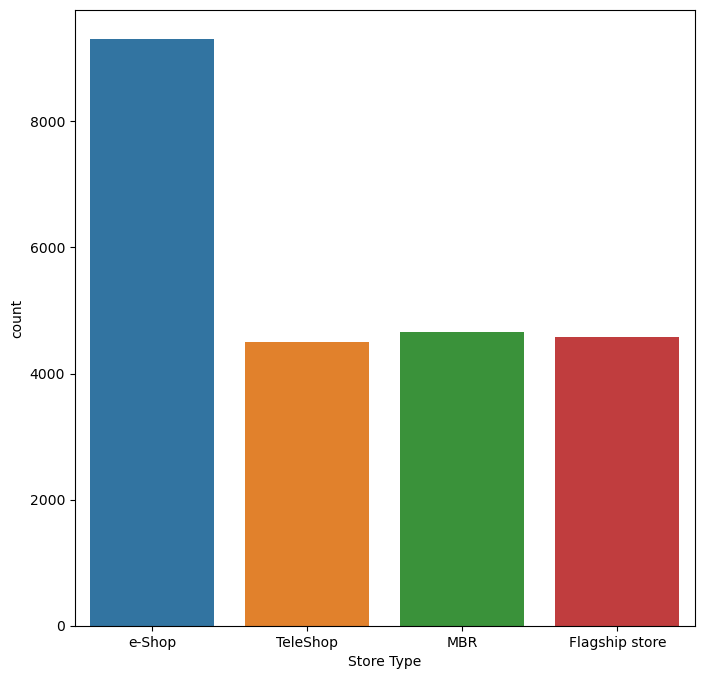

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Store_type'])
plt.xlabel('Store Type')
plt.show()

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


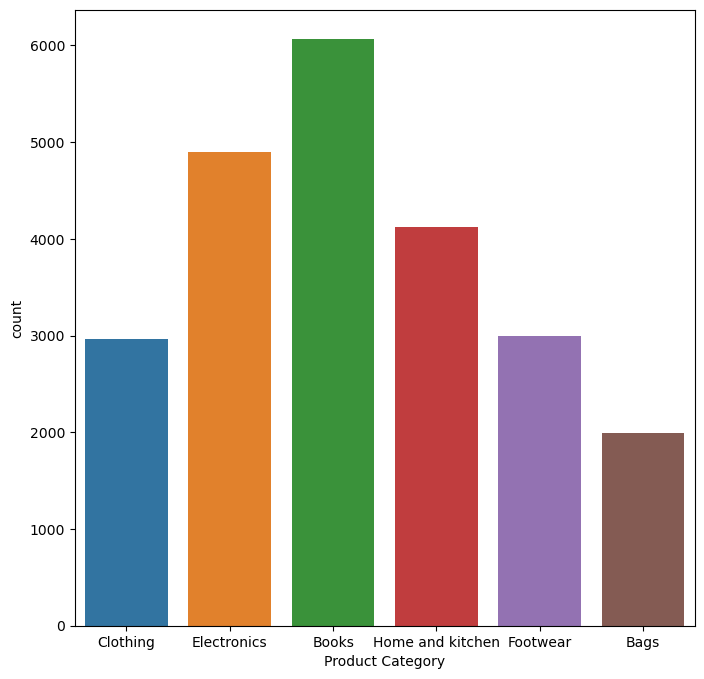

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['prod_cat'])
plt.xlabel('Product Category')
plt.show()

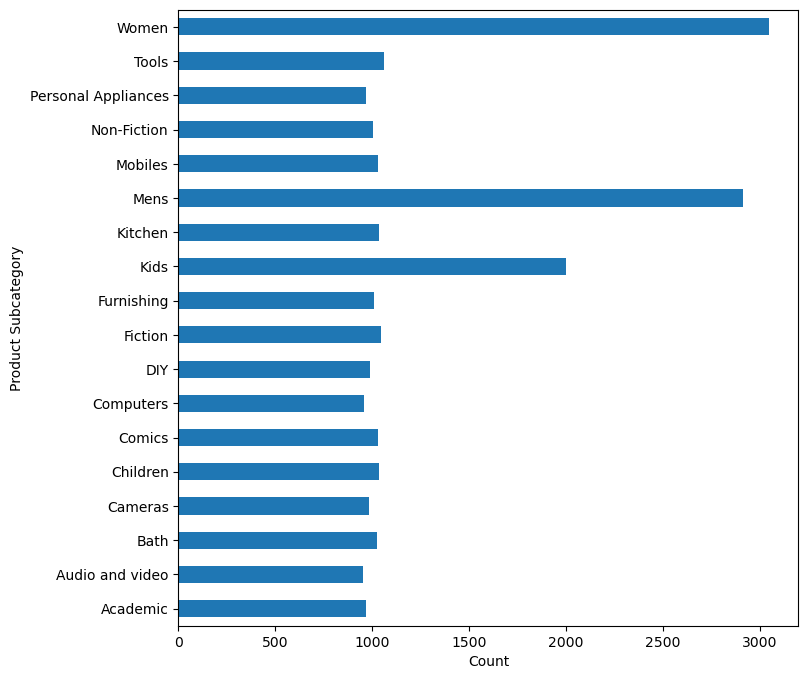

In [38]:
plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

In [39]:
Customer_Final.sort_values( by = 'tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-03-12,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-08-04,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,275246,1970-06-25,M,3.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-08-11,M,4.0


In [40]:
min_date = Customer_Final['tran_date'].min()

In [41]:
max_date = Customer_Final['tran_date'].max()

In [42]:
print('Time Period is ' + pd.Timestamp.strftime(min_date, format= "%d-%m-%Y") + " to " +  pd.Timestamp.strftime(max_date, format = "%d-%m-%Y")) 

Time Period is 02-01-2011 to 02-12-2014


In [44]:
## b. Count of transactions where the total amount of transaction was negative
Customer_Final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [45]:
negative_trans = Customer_Final.loc[Customer_Final["total_amt"] < 0, "transaction_id"].count()

In [46]:
negative_trans

2164

In [47]:
print("count of negative transaction is ", negative_trans)

count of negative transaction is  2164


In [49]:
## 5. Analyze which product categories are more popular among females vs male customers.
product_gender = Customer_Final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

In [50]:
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


In [51]:
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


In [52]:
## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

Customer_Final.head(3)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [53]:
customer_group = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

In [54]:
customer_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

In [55]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)

In [56]:
percentage

10.52

In [57]:
print("City code 4.0 has the maximum customers and the percentage is ",percentage)

City code 4.0 has the maximum customers and the percentage is  10.52


In [58]:
## 7. Which store type sells the maximum products by value and by quantity?
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0


In [59]:
Customer_Final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)

C:\Users\SONY\AppData\Local\Temp\ipykernel_6036\3468065753.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_Final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


In [60]:
print('e-shop sells the max by value & quantity')

e-shop sells the max by value & quantity


In [61]:
## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

store_group = round(Customer_Final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)


In [62]:
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [63]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

In [64]:
## 9. What was the total amount earned from "Male" customers under the "Electronics" category?
gender_group = round(Customer_Final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

In [65]:
gender_group

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.22,3020200.36
Home and kitchen,4133702.24,4305169.50


In [66]:
male_earning = gender_group.loc["Electronics","M"]

In [67]:
male_earning

5711351.62

In [68]:
## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

new_tran = Customer_Final.loc[Customer_Final["total_amt"]>0,:]


In [69]:
new_tran.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-09-03,M,6.0


In [70]:
unique_trans = new_tran.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [71]:
unique_trans.head(2)

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2


In [72]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [73]:
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [74]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [75]:
print('There is no such transaction greater than 10')

There is no such transaction greater than 10


In [76]:
## 11. For all customers aged between 25 - 35, find out:
## a. What was the total amount spent for “Electronics” and “Books” product categories?

now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%m%d%y')    # 1
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')


In [77]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,49.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0,41.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0


In [78]:
Customer_Final['Age_grp'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [79]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_grp
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35


In [80]:
customer25_35 = Customer_Final.groupby(['Age_grp','prod_cat'])['total_amt'].sum()

In [81]:
customer25_35

Age_grp  prod_cat        
25-35    Bags                1022459.815
         Books               3086548.985
         Clothing            1747654.740
         Electronics         2784849.730
         Footwear            1682237.635
         Home and kitchen    2200747.835
36-46    Bags                1924810.550
         Books               6234204.470
         Clothing            2975944.010
         Electronics         4983982.055
         Footwear            2951681.525
         Home and kitchen    4048546.515
47-57    Bags                1179071.465
         Books               3511839.175
         Clothing            1527538.740
         Electronics         2961874.045
         Footwear            1591985.655
         Home and kitchen    2195317.865
Name: total_amt, dtype: float64

In [82]:
customer25_35.loc['25-35',['Books','Electronics']]

Age_grp  prod_cat   
25-35    Books          3086548.985
         Electronics    2784849.730
Name: total_amt, dtype: float64

In [83]:
print("Total amount spent on 'Electronics' and 'Books' is", 
      customer25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' is 5871398.72


In [84]:
## b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

Customer_Final.head()


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_grp
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35


In [85]:
customer_total_amount_25_35 = Customer_Final[Customer_Final['Age_grp']== '25-35']

In [86]:
customer_total_amount_25_35.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_grp
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,268444,1992-02-01,F,6.0,31.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.08,106.08,Flagship store,Footwear,Women,267466,1987-06-08,F,7.0,35.0,25-35


In [87]:
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [88]:
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_grp
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-02-01,F,6.0,31.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,Footwear,Women,267466,1987-06-08,F,7.0,35.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,14460826915,269348,2014-01-01,11,6,3,84,26.460,278.460,MBR,Home and kitchen,Bath,269348,1989-10-02,M,9.0,33.0,25-35
1051,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,269536,1990-03-21,M,5.0,32.0,25-35
1054,42711619809,271701,2014-01-01,1,2,5,336,176.400,1856.400,MBR,Footwear,Mens,271701,1991-11-07,M,7.0,31.0,25-35
1059,67088172893,271877,2014-01-01,1,1,1,902,94.710,996.710,e-Shop,Clothing,Women,271877,1992-03-28,F,6.0,30.0,25-35


In [89]:
print('The total amount spent between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum().round(2))

The total amount spent between 1st Jan 2014 to 1st Mar 2014 is 416154.05
